In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from scipy import stats

In [10]:
runs =[
    "run-no-ambig", "run-with-ambig", "run-general-ambig",
    "run-no-ambig-0.05-expand", "run-with-ambig-0.05-expand", "run-general-ambig-0.05-expand",
    "run-no-ambig-0.2-expand", "run-with-ambig-0.2-expand", "run-general-ambig-0.2-expand",
    "run-cg-with-lig", "run-water-refine", "run-cg-water"
]  

succes_list = ['3J95', '3J96', '5GRS', '5HNY', '5WCB', '6ACG', '6AHF', '6IRF', '6N1Q', '6N7G', '6N8Z', '6R7I', '6UBY', '6UC0']

tick_label_dict ={
    "run-no-ambig" : "it1 nr",
    "run-with-ambig" : "it1 sr",
    "run-general-ambig" : "it1 gr",
    "run-no-ambig-0.05-expand" : "it1 nr 0.05 exp",
    "run-with-ambig-0.05-expand" : "it1 sr 0.05 exp",
    "run-general-ambig-0.05-expand" : "it1 gr 0.05 exp",
    "run-no-ambig-0.2-expand" : "it1 nr 0.2 exp",
    "run-with-ambig-0.2-expand" : "it1 sr 0.2 exp",
    "run-general-ambig-0.2-expand" : "it1 gr 0.2 exp",
    "run-cg" : "coarse grained",
    "run-cg2" : "coarse grained 2",
    "run-cg-with-lig" : "cg",
    "run-water-refine" : "MD in water",
    'run-no-ambig-0.05-expand-EM' : "it1 no restraints 0.05 expand EM",
    'run-with-ambig-0.05-expand-EM' : "it1 with restraints 0.05 expand EM",
    'run-general-ambig-0.05-expand-EM' : "it1 general restraints 0.05 expand EM",
    "run-cg-water" : "cg + MD in water",
    "run-general-ambig-EM" : "it1 gr + EM"
}

def make_tick_labels(runs):
    tick_labels = []
    for run in runs:
        tick_labels.append(tick_label_dict[run])
    return tick_labels

In [11]:
def get_ref_secondary():
    """returns a DataFrame containing all the reference structure values"""
    ref_df = pd.read_csv("analysis/reference-secondary.csv", index_col = 0)
  
    return ref_df

def make_secondary_df(run):
    run = "analysis_{}".format(run)
    
    df_3J95 = pd.read_csv(("analysis/{}/3J95_secondary.csv").format(run), index_col = "structure")
    df_3J96 = pd.read_csv(("analysis/{}/3J96_secondary.csv").format(run), index_col = "structure")
    df_5GRS = pd.read_csv(("analysis/{}/5GRS_secondary.csv").format(run), index_col = "structure")
    df_5HNY = pd.read_csv(("analysis/{}/5HNY_secondary.csv").format(run), index_col = "structure")
    df_5WCB = pd.read_csv(("analysis/{}/5WCB_secondary.csv").format(run), index_col = "structure")
    df_6ACG = pd.read_csv(("analysis/{}/6ACG_secondary.csv").format(run), index_col = "structure")
    df_6AHF = pd.read_csv(("analysis/{}/6AHF_secondary.csv").format(run), index_col = "structure")
    df_6C06 = pd.read_csv(("analysis/{}/6C06_secondary.csv").format(run), index_col = "structure")
    df_6C3P = pd.read_csv(("analysis/{}/6C3P_secondary.csv").format(run), index_col = "structure")
    df_6ENY = pd.read_csv(("analysis/{}/6ENY_secondary.csv").format(run), index_col = "structure")
    df_6IRF = pd.read_csv(("analysis/{}/6IRF_secondary.csv").format(run), index_col = "structure")
    df_6N1Q = pd.read_csv(("analysis/{}/6N1Q_secondary.csv").format(run), index_col = "structure")
    df_6N7G = pd.read_csv(("analysis/{}/6N7G_secondary.csv").format(run), index_col = "structure")
    df_6N8T = pd.read_csv(("analysis/{}/6N8T_secondary.csv").format(run), index_col = "structure")
    df_6N8Z = pd.read_csv(("analysis/{}/6N8Z_secondary.csv").format(run), index_col = "structure")
    df_6R7I = pd.read_csv(("analysis/{}/6R7I_secondary.csv").format(run), index_col = "structure")
    df_6UBY = pd.read_csv(("analysis/{}/6UBY_secondary.csv").format(run), index_col = "structure")
    df_6UC0 = pd.read_csv(("analysis/{}/6UC0_secondary.csv").format(run), index_col = "structure")
    
    df_list = [
        df_3J95,
        df_3J96,
        df_5GRS,
        df_5HNY,
        df_5WCB,
        df_6ACG,
        df_6AHF,
        df_6C06,
        df_6C3P,
        df_6ENY,
        df_6IRF,
        df_6N1Q,
        df_6N7G,
        df_6N8T,
        df_6N8Z,
        df_6R7I,
        df_6UBY,
        df_6UC0,
    ]
    
    return df_list

In [12]:
def combine_dfs(analyzer):
    final_df = pd.DataFrame()
    for run in runs:
        df_list = make_secondary_df(run)
        data_frame = pd.DataFrame()
        for df in iter(df_list):
            if df.shape[0] != 0:
                structure = df.index[0][:4]
                if structure in succes_list:
                    df = df.sort_values("HADDOCK-score").reset_index().drop("structure", axis=1)
#                     df = df.sub(ref_df.loc[structure, analyzer])
                    data_frame = pd.concat([data_frame, df[analyzer]], ignore_index=True)
        final_df = pd.concat([final_df, data_frame], axis=1, ignore_index=True)
    return final_df

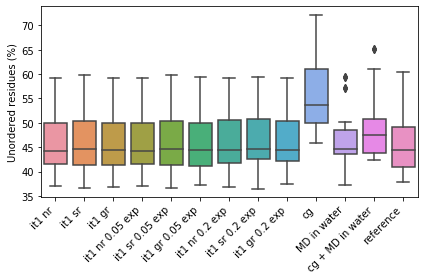

In [13]:
analyzer ="unordered"
ana_df = combine_dfs(analyzer)
ref_df = get_ref_secondary()
ref_df
ref_df = ref_df.loc[succes_list, analyzer]
df = pd.concat([ana_df, ref_df], axis=1, ignore_index=True)
xticks = make_tick_labels(runs)
xticks.append("reference")

plot = sns.boxplot(data = df)
plot.set_xticklabels(xticks, rotation=45, ha="right")
plot.set_ylabel("Unordered residues (%)")
plt.tight_layout()

In [ ]:
hgj